In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

In [3]:
companies = pd.read_csv('companies.txt', sep = '\t', encoding = 'ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding = 'ISO-8859-1')

In [4]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [6]:
round(companies.isnull().sum(axis = 0) / len(companies.index),2)

permalink        0.00
name             0.00
homepage_url     0.08
category_list    0.05
status           0.00
country_code     0.10
state_code       0.13
region           0.12
city             0.12
founded_at       0.23
dtype: float64

In [7]:
len(companies.permalink.unique())

66368

In companies file, there are 66368 records and the **permalink** column also has unique 66368 records. Hence, this column can be used as unique key for companies file. 

In [8]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [9]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [10]:
round(100 * rounds2.isnull().sum(axis = 0) / len(rounds2.index),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [11]:
len(rounds2.company_permalink.unique())

90247

rounds2 file also has a column - **company_permalink** which has permalink values from companies file. Hence, all the values in **company_permalink** column in rounds2 file must be present in **permalink** column in companies file. 

But there are around 90K unique records in rounds2 file. This discrepancy might be due to the case of characters. Let's convert all the values in both columns to lowercase and check again.

In [12]:
## Changing values in common columns in lowercase
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [13]:
## Total Unique companies in rounds table
print (len(rounds2['company_permalink'].unique()))

print (len(companies['permalink'].unique()))

66370
66368


This means there are two more records present in rounds2 file which are not present in companies file. Let's check those 2 records.

In [14]:
rounds2.loc[~(rounds2['company_permalink'].isin(companies['permalink'])), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


Interestingly, there are some special character present in few values in company_permalink column in rounds2 file. It may have happened that these values were altered after we converted all the characters in the company_permalink column to lowercase.

Let's read the rounds2 file again and check for these rows.

In [15]:
original_rounds = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')
original_rounds.iloc[[29597,31863,45176,58473,101036,113839], :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/ORGANIZATION/E-CÃBICA,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/ORGANIZATION/ENERGYSTONE-GAMES-ÇµÇ³Æ¸¸Æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/ORGANIZATION/MAGNET-TECH-Ç£Ç³Ç§Æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
113839,/ORGANIZATION/ZENGAME-Ç¦ Æ¸¸Ç§Æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


Since, no alteration to dataset happened after changing the case. This means, some changes might have been done by python after rounds2.csv  was read.

Let's check what type of encoding type of this file. To check, we can use **chardet** library

In [ ]:
import chardet
rawdata = open('rounds2.csv', 'rb').read()
result = chardet.detect(rawdata)
charenc = result['encoding']
print (charenc)

Let try to convert these special characters to proper english characters

In [16]:
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf-8').str.decode('ascii','ignore')
companies['permalink'] = companies['permalink'].str.encode('utf-8').str.decode('ascii','ignore')

Now, let's check if those special character are still present in the rounds2 file.

In [17]:
rounds2.iloc[[29597,31863,45176,58473,101036,113839], :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
113839,/organization/zengame-,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


In [18]:
print (len(companies.permalink.unique()))
print (len(rounds2.company_permalink.unique()))

66368
66368


Also, let's also check if all the values in rounds2 file are there in companies file.

In [19]:
print (len(rounds2.loc[~(rounds2['company_permalink'].isin(companies['permalink'])), :]))

0


Now, we have cleaned the unique key of the companies file and foreign keys of the rounds2 file. We can go ahead and merge these two dataframes using the unique key and then resolve missing values in rest of the columns.


In [20]:
master_frame = pd.merge(companies, rounds2, how = 'inner', left_on = 'permalink', right_on = 'company_permalink')

In [21]:
print (companies.shape, rounds2.shape, master_frame.shape)

(66368, 10) (114949, 6) (114949, 16)


In [22]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

We now have 'company_permalink' as well as 'permalink' column in the master dataframe. We can remove one.

In [23]:
master_frame.drop(columns = 'company_permalink', axis = 1, inplace = True)

Let's check percentage of missing values.

In [24]:
round(100 * master_frame.isnull().sum(axis = 0) / len(master_frame.index),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

- Column **funding_round_code** has 73% missing values which is useless and thus, this column can be removed.
- For this task, we don't need columns: **homepage_url**, **state_code**, **region**, **city**, **founded_at**. Hence, these can also be removed.

In [25]:
master_frame.drop(columns = ['funding_round_code','homepage_url','state_code','region','city','founded_at'], axis = 1, 
                  inplace = True)
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [26]:
round(100 * master_frame.isnull().sum(axis = 0) / len(master_frame.index),2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

Let's check these three columns one by one. Column - <b> raised_amount_usd </b> is an important column and the missing values in this column must be treated very carefully. 

Column <b> category_list </b> will be used to map categories to mapping file and column <b> country_code </b> will be used for country-wise analysis. Hence, these columns cannot be dropped.

In [27]:
master_frame['raised_amount_usd'].describe(percentiles = [.25,.50,.75,.90,.95,.99])

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
90%      2.000000e+07
95%      3.300000e+07
99%      1.111155e+08
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

The median is around 1 million while the mean is around 10 million. Thus there is a huge spread of data. Hence, it will be inapproprate to impute the missing values with median or mean. Also, as we have large number of observations, it will be easier to simply drop those rows.

In [28]:
master_frame = master_frame[~(np.isnan(master_frame['raised_amount_usd']))]

In [29]:
round(100 * master_frame.isnull().sum(axis = 0) / len(master_frame.index) , 2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Let's look at ```country_code``` column and see the distribution of the values in this categorical variable.

In [30]:
country_list = master_frame['country_code'].astype('category')
country_list.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
       ...  
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

Most number of investments have happened in American countries. So, we can either replace the missing values in this column by `USA` or we can delete these rows.

Since, we have large number observations with us. We can delete these rows.

In [31]:
master_frame = master_frame[~(master_frame['country_code'].isnull())]

In [32]:
round(100 * master_frame.isnull().sum(axis = 0) / len(master_frame.index),2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Now, only a fraction of missing values is left in the remaining data frame. only 0.65%. Let's remove them as well.

In [33]:
master_frame = master_frame[~(master_frame['category_list'].isnull())]

In [34]:
round(100 * master_frame.isnull().sum(axis = 0) / len(master_frame.index),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [35]:
round(100 * len(master_frame.index) / len(rounds2.index),2)

77.02

Now, we have clean data set. we have retained 77.02 % of the rows from the original dataset.

Since, we are interested only in 4 investment types. Let's filter the masterframe and keep only - `angel`, `venture`, `seed`, `private equity` only.

In [36]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                88529 non-null  object 
 1   name                     88528 non-null  object 
 2   category_list            88529 non-null  object 
 3   status                   88529 non-null  object 
 4   country_code             88529 non-null  object 
 5   funding_round_permalink  88529 non-null  object 
 6   funding_round_type       88529 non-null  object 
 7   funded_at                88529 non-null  object 
 8   raised_amount_usd        88529 non-null  float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [37]:
master_frame = master_frame[(master_frame['funding_round_type'] == 'angel') | 
                            (master_frame['funding_round_type'] == 'seed') |
                           (master_frame['funding_round_type'] == 'venture') | 
                            (master_frame['funding_round_type'] == 'private_equity')]
master_frame.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
7,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0


Now, as we have to select the most representative amount for each type of funding. Let's look at the distribution of raised_amount_usd.

In [38]:
master_frame['raised_amount_usd'].describe(percentiles = [.25,.50,.75,.90,.95,.99])

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
90%      2.000000e+07
95%      3.300000e+07
99%      1.000000e+08
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

There is substantial difference between mean and median. There are few values which are pushing the mean upwards. Hence, let's choose median to be the representative value. Also, let's look at the distribution of `raised_amount_usd` across each of these investment types.

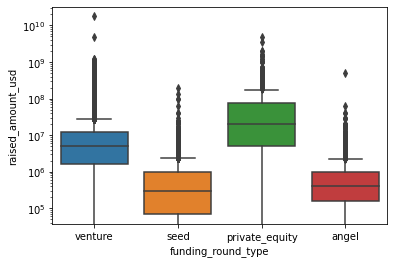

In [39]:
sns.boxplot(y = 'raised_amount_usd', x = 'funding_round_type', data = master_frame)
plt.yscale('log')
plt.show()

In [40]:
master_frame.pivot_table(values = 'raised_amount_usd', columns = 'funding_round_type', aggfunc = [np.mean, np.median])

mean                                              \
funding_round_type          angel private_equity           seed       venture   
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07   

                      median                                      
funding_round_type     angel private_equity      seed    venture  
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0

- `angel` and `seed` funding types have very low median values. They lie in the low range of the spark funds' range.
- `private_equity` have median value around 20 million which is beyond the range of spark funds.
- `venture` funding type has median around 5 million which fits into the range of spark funds. Hence, venture investment type is suitable for spark funds.


Let's filter the dataframe only for `venture` investment types.

In [41]:
master_frame = master_frame[master_frame['funding_round_type'] == 'venture']

## Country Analysis

In [42]:
master_frame.shape

(47809, 9)

In [43]:
## Identifying top countries where highest amount of funding has been done for Venture investment type
top_9_total = master_frame.groupby(by = 'country_code')['raised_amount_usd'].sum().sort_values(ascending = False)[:9]
print (top_9_total)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
Name: raised_amount_usd, dtype: float64


In [44]:
countries = top_9_total.index.tolist()
countries

['USA', 'CHN', 'GBR', 'IND', 'CAN', 'FRA', 'ISR', 'DEU', 'JPN']

Using the link: https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language
Top 3 countries where English is the official or one of the official languages are: **USA, GBR, IND**

In [45]:
top3 = master_frame[(master_frame['country_code'] == 'USA') | 
                    (master_frame['country_code'] == 'GBR') | 
                    (master_frame['country_code'] == 'IND')]

In [46]:
top3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38803 entries, 0 to 114936
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                38803 non-null  object 
 1   name                     38803 non-null  object 
 2   category_list            38803 non-null  object 
 3   status                   38803 non-null  object 
 4   country_code             38803 non-null  object 
 5   funding_round_permalink  38803 non-null  object 
 6   funding_round_type       38803 non-null  object 
 7   funded_at                38803 non-null  object 
 8   raised_amount_usd        38803 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB


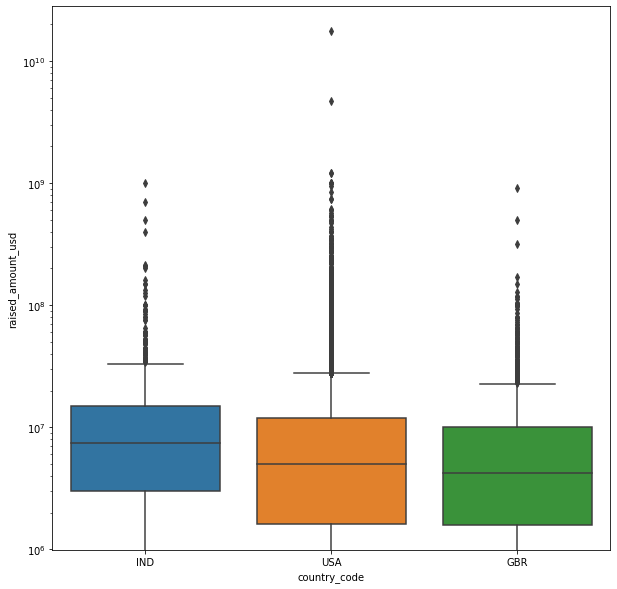

In [47]:
plt.figure(figsize = (10,10))
sns.boxplot(x = top3['country_code'], y = top3['raised_amount_usd'])
plt.yscale('log')
plt.show()

By now, we have selected `venture` funding type and three countries - **USA, GBR, IND**. Now, let's choose sectors.

## Sector Analysis

Sectors in which most of the investments have been made. Most of the values have multiple sectors like - `Application Platforms|Real Time|Social Network`. As per business rule, first sector is considered as the primary sector i.e. `Application Platforms`. 

Hence, considering only the first sector as the primary sector from category_list column.

In [48]:
top3.loc[: , 'primary_sector'] = top3['category_list'].str.split('|').str[0]
## or
## top3.loc[: , 'primary_sector'] = top3['category_list'].apply(lambda x : x.split('|')[0])
top3.drop('category_list', axis = 1, inplace = True)

C:\Users\aniruddha\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\aniruddha\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\aniruddha\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [49]:
top3.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,Media
10,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,acquired,USA,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,Apps


In [50]:
## Reading the file mapping.csv
mapping = pd.read_csv('mapping.csv', sep = ',')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [51]:
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


Let's remove the missing values first.

In [52]:
mapping = mapping[~(pd.isnull(mapping['category_list']))]

In [53]:
mapping.isnull().sum(axis = 0)

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [54]:
## Convert common columns in top3 and mapping dataframes to lowercase
top3['primary_sector'] = top3['primary_sector'].str.lower()
mapping['category_list'] = mapping['category_list'].str.lower()

<ipython-input-54-c3cc594a805f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top3['primary_sector'] = top3['primary_sector'].str.lower()


In [55]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3d,0,0,0,0,0,1,0,0,0
2,3d printing,0,0,0,0,0,1,0,0,0
3,3d technology,0,0,0,0,0,1,0,0,0
4,accounting,0,0,0,0,0,0,0,0,1
5,active lifestyle,0,0,0,0,1,0,0,0,0


Before merging, let's check if the all values in the column `primary_sector` in top3 file are present in `category_list` column in mapping file.

In [56]:
top3.loc[~(top3['primary_sector'].isin(mapping['category_list'])) , 'primary_sector']

10                  analytics
11                  analytics
12                  analytics
61                  analytics
198                 analytics
                 ...         
114632    property management
114660                finance
114661                finance
114663                finance
114664                finance
Name: primary_sector, Length: 2616, dtype: object

Few values like analytics, property management, finance etc are not present in the mapping file. Let's now cross check the mapping file in the same way.

In [57]:
mapping.loc[~(mapping['category_list'].isin(top3['primary_sector'])) ]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
670,virtual workforces,0,0,0,1,0,0,0,0,0
672,waste ma0gement,0,0,1,0,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


Here, we can notice a data quality issue. Values like `a0lytics, ma0gement` etc are supposed to be `analytics, management`. This pattern is not random. Only `na` keywords are replaced by `0`. May be someone was trying to replace `NA` values with `0`.

Let's treat this issue by replacing `0` by `na` but while doing do we have to make sure that any numbers that contains 0 should not be replaced **(for example: enterprise 2.0)**. Only the strings which contains `0` in between characters should be replaced **(for example: ma0gement)**.

We would use regular expression for that. We'll create a pattern that looks for zeroes which are in between characters and replace such zeroes with **na** which are in between characters

In [58]:
mapping['category_list'] = mapping['category_list'].apply(lambda x : x.replace('0','na'))
#mapping['category_list'] = mapping['category_list'].apply(lambda x : re.sub('0','na',x) if re.search('\w0\w',x) else x)

Let's cross check both dataframes again.

In [59]:
mapping.loc[~mapping['category_list'].isin(top3['primary_sector'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
669,video streaming,0,0,0,1,0,0,0,0,0
670,virtual workforces,0,0,0,1,0,0,0,0,0
682,weddings,0,0,0,1,0,0,0,0,0
683,wholesale,0,0,0,0,0,0,0,1,0


In [60]:
top3.loc[~(top3['primary_sector'].isin(mapping['category_list']))]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector
20328,/organization/clean-vehicle-solutions,Clean Vehicle Solutions,operating,USA,/funding-round/7b991c526219c2edff8789942215d93b,venture,26-02-2010,125000.0,natural gas uses
22940,/organization/consensus-point,Consensus Point,operating,USA,/funding-round/11ad1d209af6e06e87467f3432aa735f,venture,19-04-2011,788374.0,enterprise 2.0
22942,/organization/consensus-point,Consensus Point,operating,USA,/funding-round/7cdac9335cdc78285e8dcd1932f8729b,venture,18-07-2012,2600000.0,enterprise 2.0
28541,/organization/dolores-speech-products,Dolores Speech Products,operating,USA,/funding-round/ba7393d89b2a5ad0c076e2295794c4ce,venture,07-04-2015,250000.0,adaptive equipment
35278,/organization/fia-formula-e,FIA Formula E,closed,GBR,/funding-round/19a09624fcf806a4a64809462a4e391c,venture,15-05-2014,68569234.0,racing
36012,/organization/five-below,Five Below,ipo,USA,/funding-round/2a50c59492585ea4080fa67de755a442,venture,14-10-2010,194000000.0,specialty retail
36291,/organization/flexport,Flexport,operating,USA,/funding-round/e890e1058ab6be04e9559cd34ee6382c,venture,06-08-2015,20000000.0,enterprise 2.0
43506,/organization/healthtell,HealthTell,operating,USA,/funding-round/8edf7332fface9972541807a248690b3,venture,13-06-2014,9486929.0,biotechnology and semiconductor
51816,/organization/justinmind,Justinmind,operating,USA,/funding-round/c6e9adcef86247dccf8418dc3e4b9a0b,venture,17-12-2007,862000.0,rapidly expanding
70078,/organization/omega-point-research,Omega Point Research,closed,USA,/funding-round/4870743e3fded9317f5611eb2e848667,venture,14-05-2015,3172815.0,product search


In [61]:
master = pd.merge(top3, mapping, how = 'inner', left_on = 'primary_sector', right_on = 'category_list')
master.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,primary_sector,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


We have duplicate columns - `primary_sector` and `category_list`. We can remove one column

In [62]:
master = master.drop(columns = 'category_list', axis = 1)

In [63]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 0 to 38787
Data columns (total 18 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   permalink                                38788 non-null  object 
 1   name                                     38788 non-null  object 
 2   status                                   38788 non-null  object 
 3   country_code                             38788 non-null  object 
 4   funding_round_permalink                  38788 non-null  object 
 5   funding_round_type                       38788 non-null  object 
 6   funded_at                                38788 non-null  object 
 7   raised_amount_usd                        38788 non-null  float64
 8   primary_sector                           38788 non-null  object 
 9   Automotive & Sports                      38788 non-null  int64  
 10  Blanks                                   38788

### Converting wide dataframe to long dataframe

Columns representing the main category in the mapping file are originally in the wide format. They contain values '1' if the company belongs to that category otherwise '0'. This is quite redundant. We can have a column named sub-category having these values.

So, let's the convert this master data frame from wide format into long format. We will all the value variables (those which are to be melted) into an array. The rest will be index variables.

For this we will make use of the **melt** function in pandas.

In [64]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index: bool = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``fram

In [68]:
## Let's store the value of value variables and id variables in separate arrays.

value_vars = master.columns[9:]
id_vars = np.setdiff1d(master.columns, value_vars)
print (value_vars)
print (id_vars)

Index(['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'],
      dtype='object')
['country_code' 'funded_at' 'funding_round_permalink' 'funding_round_type'
 'name' 'permalink' 'primary_sector' 'raised_amount_usd' 'status']


In [69]:
df = pd.melt(master, id_vars = list(id_vars), value_vars = list(value_vars))
df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,primary_sector,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,#fame,/organization/-fame,media,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,90min,/organization/90min,media,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,90min,/organization/90min,media,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,90min,/organization/90min,media,18000000.0,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,All Def Digital,/organization/all-def-digital,media,5000000.0,operating,Automotive & Sports,0


In [70]:
## Now, the can get rid of the rows where value is 0 and remove the value column
df = df[df['value']!=0]
df = df.drop('value', axis= 1)

In [71]:
df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,primary_sector,raised_amount_usd,status,variable
25828,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,3D Robotics,/organization/3d-robotics,drones,5000000.0,operating,Automotive & Sports
25829,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,3D Robotics,/organization/3d-robotics,drones,14000000.0,operating,Automotive & Sports
25830,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,3D Robotics,/organization/3d-robotics,drones,30000000.0,operating,Automotive & Sports
25831,USA,25-02-2015,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,3D Robotics,/organization/3d-robotics,drones,50000000.0,operating,Automotive & Sports
25832,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,Cape Productions,/organization/cape-productions,drones,10000000.0,operating,Automotive & Sports


In [72]:
## Renaming the column 'variable'
df = df.rename(columns = {'variable':'sector'})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38788 entries, 25828 to 349075
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   country_code             38788 non-null  object 
 1   funded_at                38788 non-null  object 
 2   funding_round_permalink  38788 non-null  object 
 3   funding_round_type       38788 non-null  object 
 4   name                     38788 non-null  object 
 5   permalink                38788 non-null  object 
 6   primary_sector           38788 non-null  object 
 7   raised_amount_usd        38788 non-null  float64
 8   status                   38788 non-null  object 
 9   sector                   38788 non-null  object 
dtypes: float64(1), object(9)
memory usage: 3.3+ MB


Now, the dataframe contains only `venture` type of funding with investments only in countries 'USA', 'GBR' and 'IND'. We have also mapped each company to one of the main sector.

Now, we can compute sector wise analysis.

In [73]:
df = df[(df['raised_amount_usd']>=5000000) & (df['raised_amount_usd']<=15000000)]
df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,name,permalink,primary_sector,raised_amount_usd,status,sector
25828,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,3D Robotics,/organization/3d-robotics,drones,5000000.0,operating,Automotive & Sports
25829,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,3D Robotics,/organization/3d-robotics,drones,14000000.0,operating,Automotive & Sports
25832,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,Cape Productions,/organization/cape-productions,drones,10000000.0,operating,Automotive & Sports
25833,USA,31-03-2015,/funding-round/bdf644f3fa66533c048719bf0d000893,venture,DroneDeploy,/organization/dronedeploy,drones,9000000.0,operating,Automotive & Sports
25836,USA,30-12-2014,/funding-round/cf1321bcd5745aade7e99eedaaa26ded,venture,Ehang,/organization/ehang,drones,10000000.0,operating,Automotive & Sports


In [74]:
df.groupby(by = ['country_code','sector'])['raised_amount_usd'].agg(['count','sum'])

count           sum
country_code sector                                                      
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

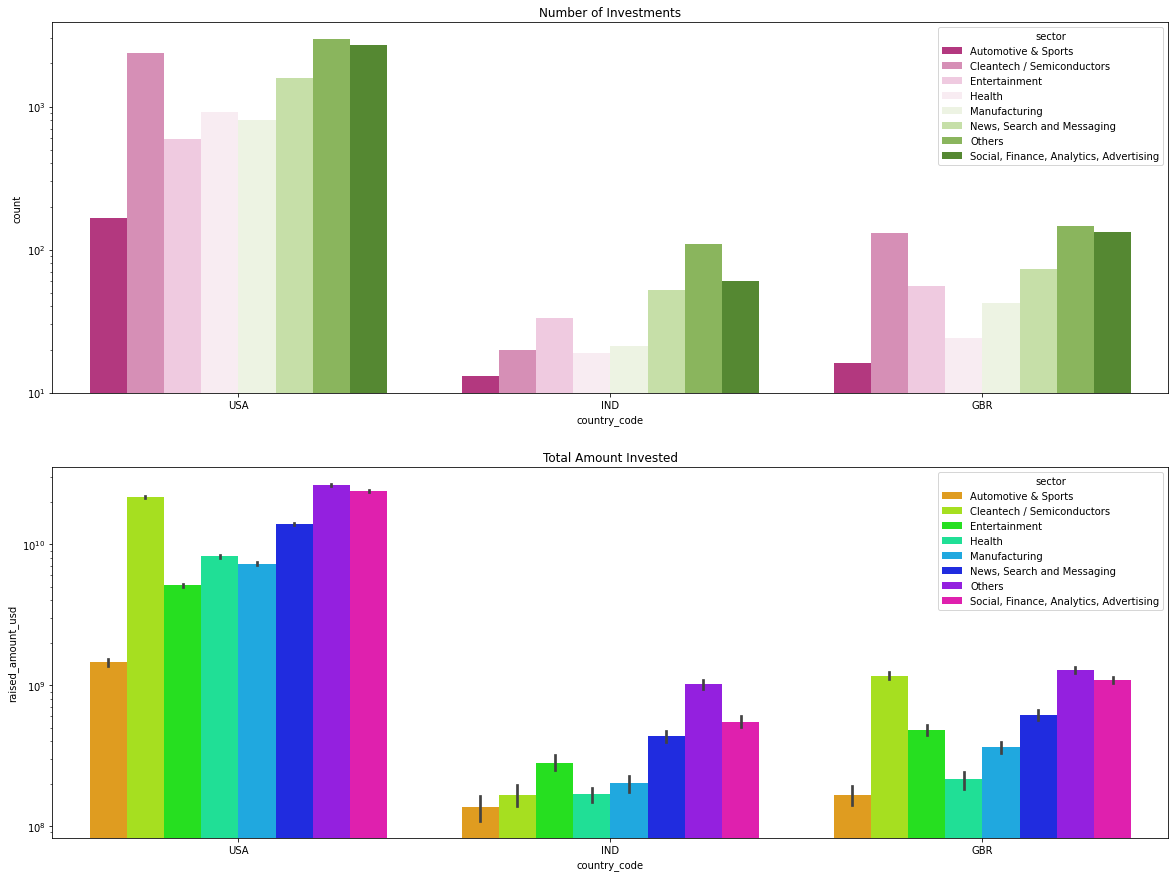

In [112]:
##Plotting country wise analysis and sectors in which investments were made.
plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
sns.countplot(x = 'country_code', hue = 'sector', data =df, palette = 'PiYG')
plt.yscale('log')
plt.title('Number of Investments')

plt.subplot(2,1,2)
sns.barplot(x = 'country_code',hue = 'sector', y = 'raised_amount_usd', data = df, estimator = np.sum, palette = 'hsv')
plt.yscale('log')
plt.title('Total Amount Invested')

plt.show()

## Observations

### USA:
Top 3 sectors with most number of investments:
1. Others
2. Cleantech / Semiconductors
3. Social, Finance, Analytics, Advertising

Top 3 sectors with maximum amount of investments:
1. Others
2. Cleantech / Semiconductors
3. Social, Finance, Analytics, Advertising

### IND
Top 3 sectors with most number of investments:
1. Others
2. News, Search and Messaging
3. Social, Finance, Analytics, Advertising

Top 3 sectors with maximum amount of investments:
1. Others
2. Social, Finance, Analytics, Advertising
3. News, Search and Messaging

### GBR
Top 3 sectors with most number of investments:
1. Others
2. Cleantech / Semiconductors
3. Social, Finance, Analytics, Advertising

Top 3 sectors with maximum amount of investments:
1. Others
2. Cleantech / Semiconductors
3. Social, Finance, Analytics, Advertising